# Baseline

In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, mixture
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import h5py 

import sys
sys.path.append('../../')

from evaluation import *
np.random.seed(5)

/home/aryzhikov/.conda/envs/lasagne2.7/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import pandas as pd
#! wget -o  ../../datasets/ https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz
column_names = 'label, lepton pT, lepton eta, lepton phi, missing energy magnitude, missing energy phi, jet 1 pt, jet 1 eta, jet 1 phi, jet 1 b-tag, jet 2 pt, jet 2 eta, jet 2 phi, jet 2 b-tag, jet 3 pt, jet 3 eta, jet 3 phi, jet 3 b-tag, jet 4 pt, jet 4 eta, jet 4 phi, jet 4 b-tag, m_jj, m_jjj, m_lv, m_jlv, m_bb, m_wbb, m_wwbb'.split(', ')
data = pd.read_csv('../../datasets/HIGGS.csv.gz', header=None, names=column_names)

In [3]:
X_data = data.drop('label', 1)
X_data = StandardScaler().fit_transform(X_data)

labels = data["label"]

In [4]:
from sklearn.model_selection import train_test_split
indx_train, indx_test = train_test_split(np.arange(len(labels), dtype='int32'), stratify=labels, train_size=0.1, test_size=0.1, random_state = 5)

In [5]:
y_train = labels[indx_train]
y_test = labels[indx_test]

X_train = X_data[indx_train]
X_test = X_data[indx_test]

In [14]:
import keras
from keras.models import Sequential
from keras import layers as L

net = Sequential()
net.add(L.Dense(400, input_shape=(X_data.shape[1],), activation = 'relu'))
net.add(L.Dense(1, activation='sigmoid'))

adam = keras.optimizers.Adam(lr=0.01, decay=1e-3)
net.compile(optimizer=adam, loss='binary_crossentropy')

In [15]:
history = net.fit(X_train, y_train, batch_size=10000, epochs=30, validation_split = 0.1, verbose=1, shuffle=True)

Train on 990000 samples, validate on 110000 samples
Epoch 1/30
990000/990000 [==============================] - 2s 2us/step - loss: 0.5922 - val_loss: 0.5667
Epoch 2/30
990000/990000 [==============================] - 1s 1us/step - loss: 0.5527 - val_loss: 0.5463
Epoch 3/30
990000/990000 [==============================] - 1s 1us/step - loss: 0.5380 - val_loss: 0.5362
Epoch 4/30
990000/990000 [==============================] - 1s 1us/step - loss: 0.5288 - val_loss: 0.5296
Epoch 5/30
990000/990000 [==============================] - 1s 2us/step - loss: 0.5224 - val_loss: 0.5248
Epoch 6/30
990000/990000 [==============================] - 1s 1us/step - loss: 0.5183 - val_loss: 0.5220
Epoch 7/30
990000/990000 [==============================] - 1s 1us/step - loss: 0.5154 - val_loss: 0.5182
Epoch 8/30
990000/990000 [==============================] - 1s 1us/step - loss: 0.5114 - val_loss: 0.5161
Epoch 9/30
990000/990000 [==============================] - 1s 1us/step - loss: 0.5103 - val_loss: 0

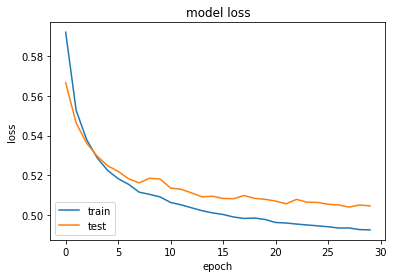

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()

1100000/1100000 [==============================] - 1s 1us/step

('f1_score ', 0.7645391750408238)
confusion_matrix 
[[374816 142272]
 [134147 448765]]


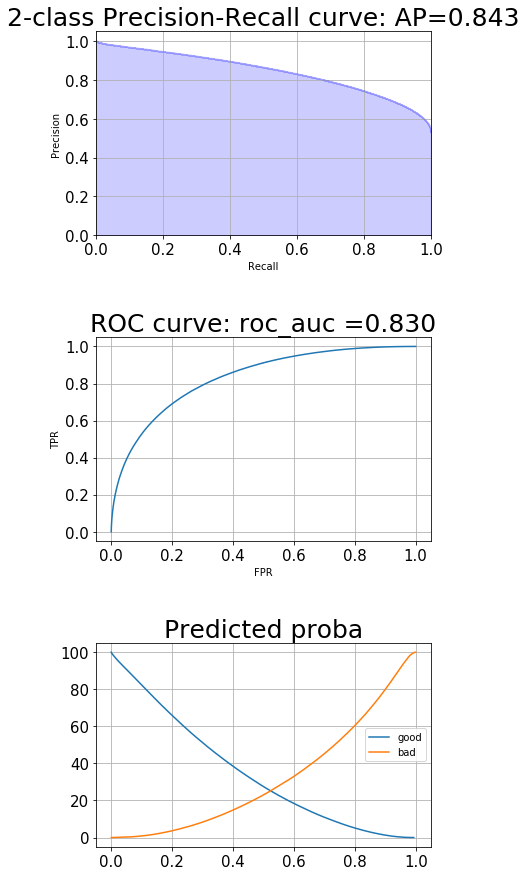

In [17]:
y_pred = net.predict(X_test, verbose=1, batch_size=10000)
print ('')
perfomance(y_test, y_pred)